<a href="https://colab.research.google.com/github/nguyetvo/CBD-Melbourne-Housing-Predict/blob/master/Melbourne_Housing_Predict_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from pandas import read_csv, DataFrame

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data =  pd.read_csv('/content/drive/My Drive/Melbourne Housing Predict/Melbourne_housing_FULL.csv')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [0]:
#change Postcode
data['Postcode']= data['Postcode'].astype('object')
#change Bathroom and car to integer. Before the transformation I need to convert all the missing values to 0. 
#lastly, change Propertycount to category
data['Propertycount']= data['Propertycount'].astype('object')

In [0]:
#replace outlier building area
data['BuildingArea'].replace(44515.0, 445, inplace=True)

In [0]:
# check YearBuilt > 2018
print(data['YearBuilt'].loc[data.YearBuilt>2018])
#replace 2106 with 2016 and 2019 with 2018
data['YearBuilt'].replace([2106, 2019], [2016, 2018], inplace=True)

2453     2106.0
33033    2019.0
Name: YearBuilt, dtype: float64


In [0]:
# We will save the "cured" data columns in variables
#first with the mean
priceWithMean = data['Price'].fillna(data['Price'].mean())
BAWithMean = data['BuildingArea'].fillna(data['BuildingArea'].mean())

#now with the median
priceMedian = data['Price'].fillna(data['Price'].median())
BAMedian = data['BuildingArea'].fillna(data['BuildingArea'].median())

In [0]:
data['Price']= data['Price'].fillna(data['Price'].median())
data['Landsize']= data['Landsize'].fillna(data['Landsize'].median())
#Similarly, fill the only missing value of  all the other numeric values
data['Distance'] = data['Distance'].fillna(data['Distance'].median())
data['BuildingArea']= data['BuildingArea'].fillna(data['BuildingArea'].median())
data['Lattitude']= data['Lattitude'].fillna(data['Lattitude'].median())
data['Longtitude']= data['Longtitude'].fillna(data['Longtitude'].median())
data['YearBuilt']= data['YearBuilt'].fillna(data['YearBuilt'].median())
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            1
Bedroom2         8217
Bathroom         8226
Car              8728
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude           0
Longtitude          0
Regionname          3
Propertycount       3
dtype: int64

In [0]:
data['Bathroom']= data['Bathroom'].fillna(data['Bathroom'].mode()[0])
data['Bedroom2']= data['Bedroom2'].fillna(data['Bedroom2'].mode()[0])
data['Car']= data['Car'].fillna(data['Car'].mode()[0])
data['CouncilArea']= data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])
data['Regionname']= data['Regionname'].fillna(data['Regionname'].mode()[0])
data['Propertycount']= data['Propertycount'].fillna(data['Propertycount'].mode()[0])
data['Postcode']= data['Postcode'].fillna(data['Postcode'].mode()[0])
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [0]:
data.drop(columns=['Lattitude','Longtitude'], inplace=True)

In [0]:
data.drop(columns='YearBuilt', inplace=True)

In [0]:
data = data[pd.notnull(data['BuildingArea'])]

In [0]:
import copy
data_regr = copy.copy(data[pd.notnull(data['Price'])])

In [0]:
data.drop(columns='Bedroom2', inplace=True)

In [0]:
data_regr.drop(columns='Bedroom2', inplace=True)

# Regression

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error


In [0]:
data_regr.drop(columns=['Suburb','Postcode'], inplace=True)

In [0]:
import datetime
def to_year(date_str):
    return datetime.datetime.strptime(date_str.strip(),'%d/%m/%Y').year

In [0]:
data_regr['Date'] = data_regr.Date.apply(to_year)

In [0]:
data_regr.Date.value_counts()

2017    19852
2016    10292
2018     4713
Name: Date, dtype: int64

In [0]:
import re
def to_street(str):
    return re.sub('[^A-Za-z]+', '', str)

In [0]:
data_regr.Address.apply(to_street).value_counts().count()

12164

It still has up to 12164 unique value. For regression, this column is too diversed. Hence, I drop it.

In [0]:
data_regr.drop(columns='Address', inplace=True)

In [0]:
counts = data_regr.SellerG.value_counts()
counts

Jellis           3359
Nelson           3236
Barry            3235
hockingstuart    2623
Marshall         2027
                 ... 
Christou            1
Airport             1
Bradly              1
A                   1
Bombay              1
Name: SellerG, Length: 388, dtype: int64

In [0]:
data_regr.SellerG[data['SellerG'].isin(counts[counts < 100].index)] = 'less than 100'
data_regr.SellerG[data['SellerG'].isin(counts[(counts >= 100) & (counts < 200)].index)] = '100 - 200'
data_regr.SellerG[data['SellerG'].isin(counts[(counts >= 200) & (counts < 500)].index)] = '200 - 500'
data_regr.SellerG[data['SellerG'].isin(counts[(counts >= 500) & (counts < 1000)].index)] = '500 - 1000'
data_regr.SellerG[data['SellerG'].isin(counts[counts > 1000].index)] = 'over 1000'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [0]:
data_regr.SellerG.value_counts()

over 1000        18298
200 - 500         5694
500 - 1000        5334
less than 100     3575
100 - 200         1956
Name: SellerG, dtype: int64

As we already have the Geo information of the house in the Regionname , the CouncilArea with 33 unique values can be dropped for convenience.

In [0]:
data_regr.drop(columns='CouncilArea', inplace=True)

In [0]:
data_regr.describe(include=['O']).T

,count,unique,top,freq
Type,34857,3,h,23980
Method,34857,9,S,19744
SellerG,34857,5,over 1000,18298
Regionname,34857,8,Southern Metropolitan,11839


In [0]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,3/09/2016,2.5,3067.0,1.0,1.0,126.0,136.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,136.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,0.0,136.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0


In [0]:
data = data.reset_index().drop(columns='index') # do not use inplace=True if combine
data_regr = data_regr.reset_index().drop(columns='index')

In [0]:
data_regr.head()

,Rooms,Type,Price,Method,SellerG,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,870000.0,SS,over 1000,2016,2.5,1.0,1.0,126.0,136.0,1970.0,-37.8014,144.9958,Northern Metropolitan,4019.0
1,2,h,1480000.0,S,500 - 1000,2016,2.5,1.0,1.0,202.0,136.0,1970.0,-37.7996,144.9984,Northern Metropolitan,4019.0
2,2,h,1035000.0,S,500 - 1000,2016,2.5,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0
3,3,u,870000.0,VB,less than 100,2016,2.5,2.0,1.0,0.0,136.0,1970.0,-37.8114,145.0116,Northern Metropolitan,4019.0
4,3,h,1465000.0,SP,500 - 1000,2017,2.5,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0


**One-hot Encode**

In [0]:
categoricals = ['Type', 'Method', 'SellerG', 'Regionname', 'Date']
for feature in categoricals:
    df = copy.copy(pd.get_dummies(data_regr[feature], drop_first=True))
    data_regr = pd.concat([data_regr, df], axis=1)
    data_regr.drop(columns=feature, inplace=True)

In [0]:
data_regr.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,t,u,PN,S,SA,SN,SP,SS,VB,W,200 - 500,500 - 1000,less than 100,over 1000,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,2017,2018
0,2,870000.0,2.5,1.0,1.0,126.0,136.0,1970.0,-37.8014,144.9958,4019.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,2,1480000.0,2.5,1.0,1.0,202.0,136.0,1970.0,-37.7996,144.9984,4019.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,3,870000.0,2.5,2.0,1.0,0.0,136.0,1970.0,-37.8114,145.0116,4019.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [0]:
data_regr.shape

(34857, 34)

**Linear Regression without PCA**

**Hold out**

In [0]:
model_HO = linear_model.LinearRegression()

In [0]:
train, test = train_test_split(data_regr, test_size = 0.2, random_state=512)

In [0]:
train.shape

(27885, 34)

In [0]:
test.shape

(6972, 34)

In [0]:
X_train = train.loc[:, data_regr.columns != 'Price']
y_train = train.Price

X_test = test.loc[:, data_regr.columns != 'Price']
y_test = test.Price

In [0]:
model_HO.fit(X_train.values, y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predict_train = model_HO.predict(X_train.values)
mean_squared_error(y_train, predict_train)

198007623274.10977

In [0]:
predict_test = model_HO.predict(X_test.values)
mean_squared_error(y_test, predict_test)

187951650405.58542

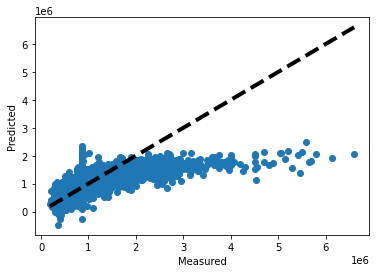

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, predict_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

**Cross validation**

In [0]:
model_CV = linear_model.LinearRegression()

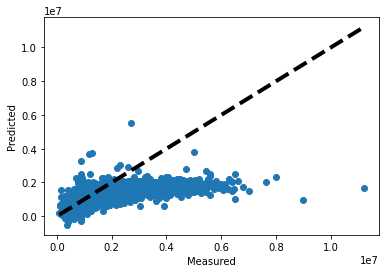

In [0]:
y = data_regr.Price
X = data_regr.loc[:, data_regr.columns != 'Price']
predicted = cross_val_predict(model_CV, X.values, y.values, cv=5)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [0]:
mean_squared_error(y.values, predicted)

198304811842.3468

According to the graph and the high value, this model does not perform well. It is possible that the model is too simple for this problem.

**Linear Regression with PCA**

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=10)

In [0]:
X_new = pd.DataFrame(pca.fit_transform(X.values))

**Hold out**

In [0]:
model_HO_PCA = linear_model.LinearRegression()

In [0]:
dataPCA = pd.concat([X_new, y], axis=1)

In [0]:
train, test = train_test_split(dataPCA, test_size = 0.2, random_state=512)

In [0]:
X_train = train.loc[:, train.columns != 'Price']
y_train = train.Price

X_test = test.loc[:, test.columns != 'Price']
y_test = test.Price

In [0]:
model_HO_PCA.fit(X_train.values, y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predict_train = model_HO_PCA.predict(X_train.values)
mean_squared_error(y_train, predict_train)

217409671467.66196

In [0]:
predict_test = model_HO_PCA.predict(X_test.values)
mean_squared_error(y_test, predict_test)

205898510754.77783

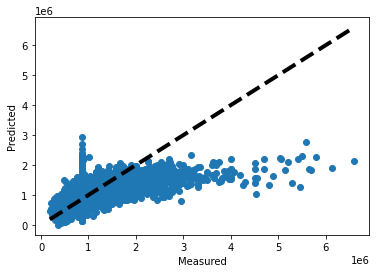

In [0]:
fig, ax = plt.subplots()
ax.scatter(y_test, predict_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

**Cross validation**

In [0]:
model_CV_PCA = linear_model.LinearRegression()

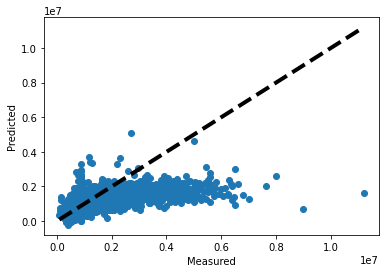

In [0]:
y = dataPCA.Price
X = dataPCA.loc[:, dataPCA.columns != 'Price']
predicted = cross_val_predict(model_CV_PCA, X.values, y.values, cv=5)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [0]:
mean_squared_error(y.values, predicted)

216669359941.2629

As expected, the original model with all of the data does not perform as very well, the model with PCA couldnt perform better.

In [0]:
X = data_regr.loc[:, data_regr.columns != 'Price']
y = data_regr.Price

In [0]:
model = linear_model.LinearRegression()

In [0]:
model.fit(X.values, y.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predict = model.predict(X.values)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


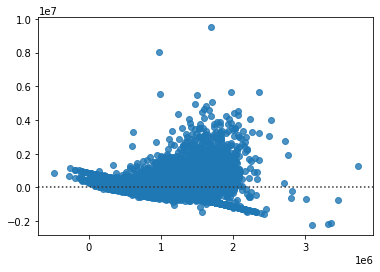

In [0]:
!pip install seaborn
import seaborn as sns

sns.residplot(predict, y.values)

the Residual Plot shows that this model is not a good fit for the problem.

In [0]:
a = (y.values - predict)

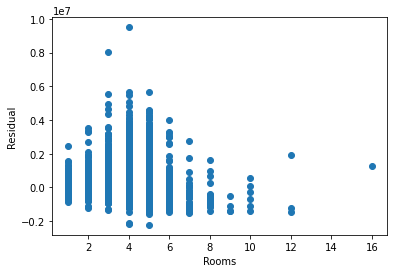

In [0]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Rooms.values, a)
ax.set_xlabel('Rooms')
ax.set_ylabel('Residual')
plt.show()

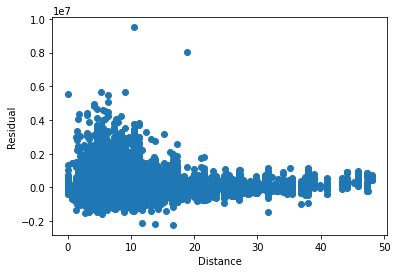

In [0]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Distance.values, a)
ax.set_xlabel('Distance')
ax.set_ylabel('Residual')
plt.show()

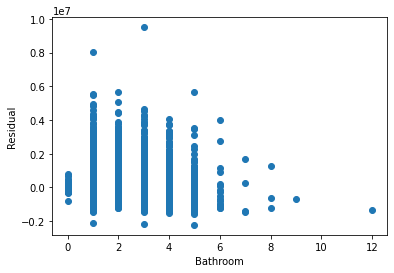

In [0]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Bathroom.values, a)
ax.set_xlabel('Bathroom')
ax.set_ylabel('Residual')
plt.show()

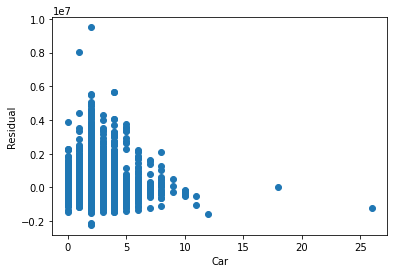

In [0]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Car.values, a)
ax.set_xlabel('Car')
ax.set_ylabel('Residual')
plt.show()

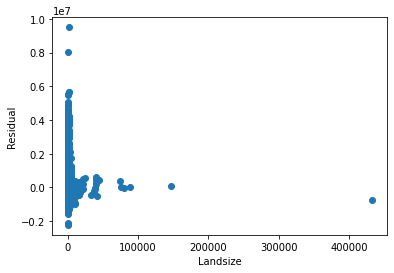

In [0]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Landsize.values, a)
ax.set_xlabel('Landsize')
ax.set_ylabel('Residual')
plt.show()

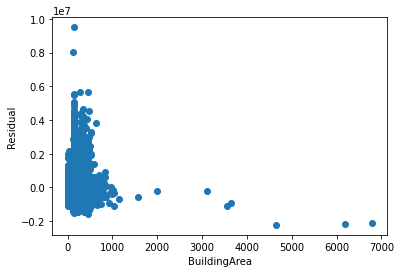

In [0]:
fig, ax = plt.subplots()
ax.scatter(data_regr.BuildingArea.values, a)
ax.set_xlabel('BuildingArea')
ax.set_ylabel('Residual')
plt.show()

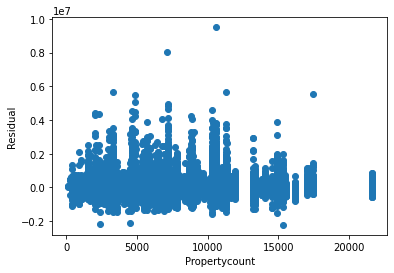

In [0]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Propertycount.values, a)
ax.set_xlabel('Propertycount')
ax.set_ylabel('Residual')
plt.show()

It shows that the variables have great heteroskedasticity value, especially the BuildingArea and the Landsize. They have many outliers. I want to eliminate all of these outliers and fit the model again to see the result.

In [0]:
data_regr = data_regr[data_regr.BuildingArea < 3000]

In [0]:
data_regr = data_regr.reset_index()

In [0]:
data_regr.drop(columns='index', inplace=True)

In [0]:
data_regr.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34851.0,3.030874e+00,0.969858,1.00000,2.0000,3.0000,4.000000e+00,1.600000e+01
Price,34851.0,1.010790e+06,571980.710175,85000.00000,695000.0000,870000.0000,1.150000e+06,1.120000e+07
Distance,34851.0,1.118420e+01,6.787633,0.00000,6.4000,10.3000,1.400000e+01,4.810000e+01
Bathroom,34851.0,1.477146e+00,0.686048,0.00000,1.0000,1.0000,2.000000e+00,1.200000e+01
Car,34851.0,1.796620e+00,0.882745,0.00000,1.0000,2.0000,2.000000e+00,2.600000e+01
Landsize,34851.0,5.688360e+02,2764.071727,0.00000,357.0000,521.0000,5.980000e+02,4.330140e+05
BuildingArea,34851.0,1.435219e+02,57.495397,0.00000,136.0000,136.0000,1.360000e+02,2.002000e+03
YearBuilt,34851.0,1.967897e+03,25.033216,1196.00000,1970.0000,1970.0000,1.970000e+03,2.018000e+03
Lattitude,34851.0,-3.780992e+01,0.079267,-38.19043,-37.8469,-37.8076,-3.777089e+01,-3.739020e+01
Longtitude,34851.0,1.450032e+02,0.105559,144.42379,144.9644,145.0078,1.450517e+02,1.455264e+02


In [0]:
data_regr = data_regr[data_regr.Landsize < 3000]
data_regr = data_regr.reset_index()
data_regr.drop(columns='index', inplace=True)

In [0]:
X = data_regr.loc[:, data_regr.columns != 'Price']
y = data_regr.Price
model = linear_model.LinearRegression()
model.fit(X.values, y.values)
predict = model.predict(X.values)
mean_squared_error(y.values, predict)

193869370874.81165

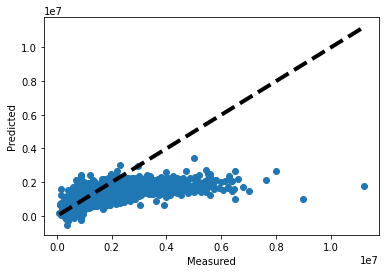

In [0]:
fig, ax = plt.subplots()
ax.scatter(y, predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

The model still does not perform really good. We might need a non-linear model for this problem.